# UAS Penambangan Data

Ali Ridwan Nurhasan

230411100154

## Prediksi Grade Glioma Menggunakan Data Klinis dan Mutasi Genetik: Dataset TCGA-LGG dan TCGA-GBM

## Pendahuluan

Glioma merupakan tumor primer otak yang paling umum ditemukan. Tumor ini dapat diklasifikasikan menjadi dua grade utama, yaitu Lower-Grade Glioma (LGG) dan Glioblastoma Multiforme (GBM), berdasarkan kriteria histologis dan pencitraan medis. Selain itu, faktor klinis serta mutasi molekuler juga memegang peranan penting dalam proses pengelompokan glioma tersebut. Namun, pemeriksaan molekuler yang akurat seringkali membutuhkan biaya yang tinggi sehingga membatasi akses bagi banyak pasien.

Dataset ini mengandung data dari 20 gen yang paling sering mengalami mutasi serta 3 fitur klinis yang diambil dari proyek TCGA-LGG dan TCGA-GBM yang berfokus pada glioma otak. Tugas utama dalam dataset ini adalah memprediksi apakah seorang pasien termasuk dalam kategori LGG atau GBM berdasarkan fitur klinis dan mutasi molekuler tersebut. Tujuan utamanya adalah untuk menemukan subset optimal dari gen mutasi dan fitur klinis yang dapat meningkatkan akurasi klasifikasi sekaligus mengurangi biaya pemeriksaan molekuler pada proses grading glioma.

## Tujuan

Tujuan dari penelitian ini adalah untuk mengembangkan model prediksi yang dapat membedakan antara Lower-Grade Glioma (LGG) dan Glioblastoma Multiforme (GBM) dengan memanfaatkan fitur klinis dan mutasi molekuler yang tersedia. Dengan menggunakan dataset yang terdiri dari 20 gen mutasi paling sering dan 3 fitur klinis dari proyek TCGA-LGG dan TCGA-GBM, diharapkan dapat ditemukan subset fitur optimal yang mampu meningkatkan akurasi klasifikasi glioma. Selain itu, tujuan lainnya adalah mengurangi ketergantungan pada tes molekuler yang mahal, sehingga proses grading glioma menjadi lebih efisien dan dapat diakses dengan biaya yang lebih rendah.

## Data Understanding

### Sumber data

https://archive.ics.uci.edu/dataset/759/glioma+grading+clinical+and+mutation+features+dataset

In [1]:
pip install ucimlrepo

## Mengambil data

Pada kode di bawah, saya melakukan pengambilan dataset glioma menggunakan pustaka ucimlrepo dengan memanggil fungsi fetch_ucirepo dan menyertakan ID dataset 759. Dataset ini berisi fitur-fitur klinis dan mutasi genetik beserta label target yang menunjukkan jenis glioma. Selanjutnya, saya menggabungkan data fitur (X) dan target (y) menjadi satu DataFrame menggunakan pandas agar memudahkan proses analisis dan pemrosesan data selanjutnya. Saya kemudian menampilkan 5 baris pertama dari dataset gabungan tersebut untuk melihat sekilas isi data dan memastikan bahwa data berhasil diambil dengan benar. Terakhir, saya menyimpan data yang telah digabung tersebut ke dalam file CSV dengan nama "glioma_dataset.csv" agar data dapat diakses dan digunakan secara efisien dalam tahap analisis dan pengolahan berikutnya.

In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Ambil dataset
data = fetch_ucirepo(id=759)

# Gabungkan fitur dan target
X = data.data.features
y = data.data.targets
df = pd.concat([X, y], axis=1)

# Tampilkan 5 baris pertama
print(df.head())

# Simpan sebagai CSV
df.to_csv("glioma_dataset.csv", index=False)


   Gender  Age_at_diagnosis   Race  IDH1  TP53  ATRX  PTEN  EGFR  CIC  MUC16  \
0       0             51.30  white     1     0     0     0     0    0      0   
1       0             38.72  white     1     0     0     0     0    1      0   
2       0             35.17  white     1     1     1     0     0    0      0   
3       1             32.78  white     1     1     1     0     0    0      1   
4       0             31.51  white     1     1     1     0     0    0      0   

   ...  RB1  NOTCH1  BCOR  CSMD3  SMARCA4  GRIN2A  IDH2  FAT4  PDGFRA  Grade  
0  ...    0       0     0      0        0       0     0     0       0      0  
1  ...    0       0     0      0        0       0     0     0       0      0  
2  ...    0       0     0      0        0       0     0     0       0      0  
3  ...    0       0     0      0        0       0     0     1       0      0  
4  ...    0       0     0      0        0       0     0     0       0      0  

[5 rows x 24 columns]


### Cek Missing Value dan Outlier

Saya melakukan pengecekan terhadap data yang sudah digabungkan untuk mengetahui apakah terdapat nilai yang hilang (missing values) pada setiap kolom dataset. Dengan menggunakan fungsi isnull().sum() dari pandas, saya menghitung jumlah nilai kosong atau tidak terisi di setiap fitur dan target. Langkah ini penting dilakukan agar saya dapat memastikan kualitas data sebelum melanjutkan ke proses analisis atau pemodelan, karena data yang mengandung missing values perlu ditangani terlebih dahulu agar tidak memengaruhi hasil pemodelan secara negatif.

In [3]:
print(df.isnull().sum())


Gender              0
Age_at_diagnosis    0
Race                0
IDH1                0
TP53                0
ATRX                0
PTEN                0
EGFR                0
CIC                 0
MUC16               0
PIK3CA              0
NF1                 0
PIK3R1              0
FUBP1               0
RB1                 0
NOTCH1              0
BCOR                0
CSMD3               0
SMARCA4             0
GRIN2A              0
IDH2                0
FAT4                0
PDGFRA              0
Grade               0
dtype: int64


Saya membuat visualisasi menggunakan boxplot untuk melihat distribusi usia pasien saat diagnosis glioma dalam dataset. Dengan menggunakan library Seaborn dan Matplotlib, saya menampilkan rentang nilai usia, median, serta potensi outlier yang mungkin ada pada data usia tersebut. Visualisasi ini membantu saya memahami karakteristik dan sebaran data usia, serta mendeteksi apakah ada nilai ekstrem yang perlu diperhatikan atau ditangani sebelum proses analisis lebih lanjut.

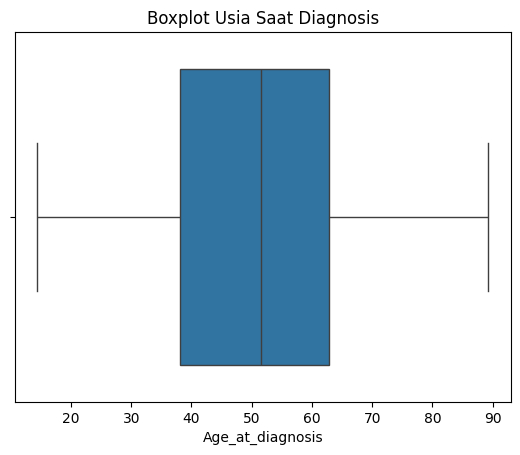

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Age_at_diagnosis'])
plt.title("Boxplot Usia Saat Diagnosis")
plt.show()


### Visualisasi Data

Saya melakukan eksplorasi data pada dataset glioma dengan membuat beberapa visualisasi yang membantu memahami karakteristik data secara menyeluruh. Pertama, saya menampilkan distribusi kelas glioma (LGG dan GBM) menggunakan grafik batang untuk melihat proporsi masing-masing kelas. Selanjutnya, saya membuat histogram distribusi usia saat diagnosis lengkap dengan kurva estimasi kepadatan (KDE) agar dapat melihat pola penyebaran usia pasien. Kemudian, saya menggunakan boxplot untuk membandingkan distribusi usia diagnosis antara kedua kelas glioma, sehingga dapat mengetahui perbedaan statistik usia di tiap kelas. Untuk melihat hubungan antar fitur numerik, saya membuat heatmap korelasi yang menampilkan tingkat hubungan antar variabel dalam dataset. Terakhir, saya membuat grafik batang untuk menunjukkan 10 gen mutasi yang paling sering ditemukan dalam dataset, sehingga dapat mengidentifikasi gen-gen kunci yang berperan penting dalam klasifikasi glioma. Visualisasi ini memberikan gambaran awal yang baik sebelum melakukan analisis atau pemodelan lebih lanjut.



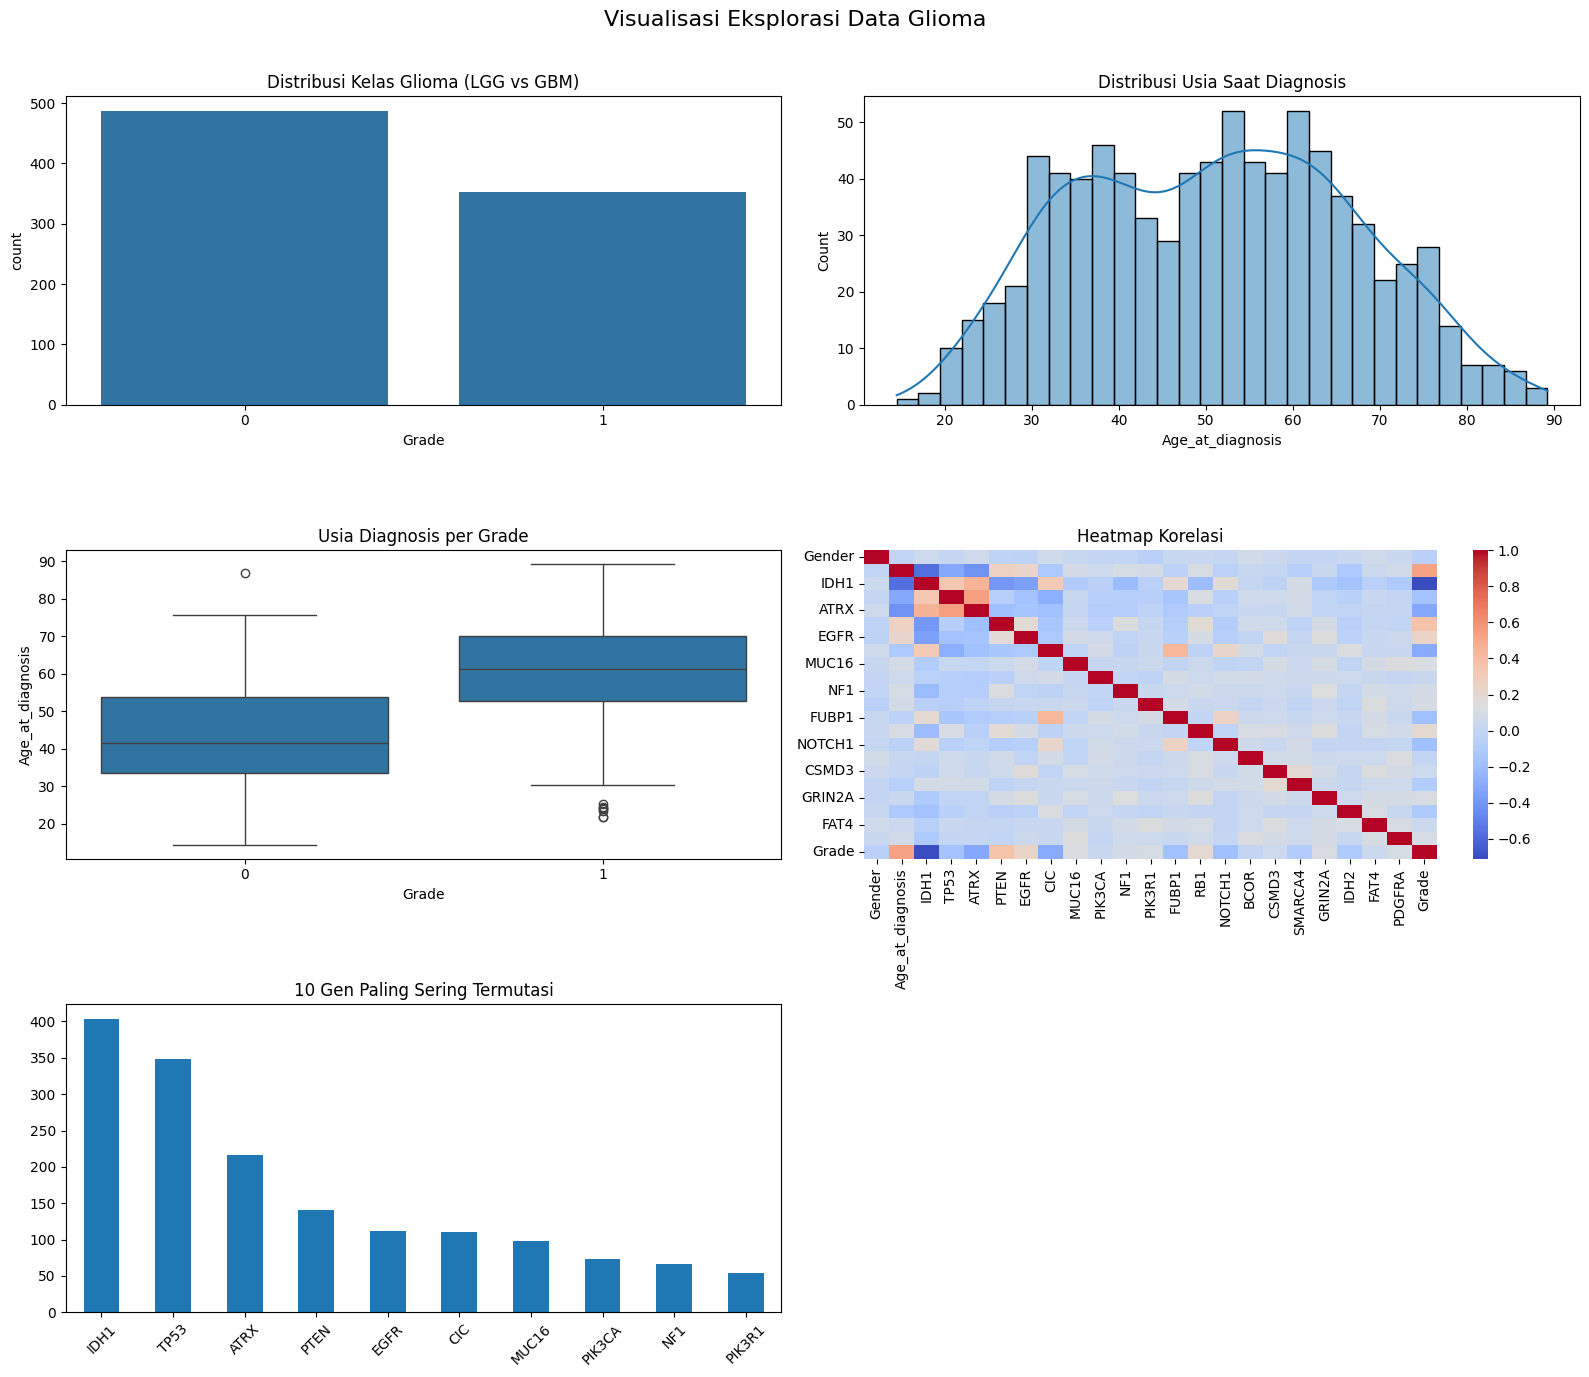

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Baca dataset
df = pd.read_csv("glioma_dataset.csv")

# Setup figure
fig, axes = plt.subplots(3, 2, figsize=(16, 14))
fig.suptitle("Visualisasi Eksplorasi Data Glioma", fontsize=16)

# 1. Distribusi Grade
sns.countplot(x='Grade', data=df, ax=axes[0, 0])
axes[0, 0].set_title("Distribusi Kelas Glioma (LGG vs GBM)")

# 2. Histogram Usia
sns.histplot(data=df, x='Age_at_diagnosis', kde=True, bins=30, ax=axes[0, 1])
axes[0, 1].set_title("Distribusi Usia Saat Diagnosis")

# 3. Boxplot Usia per Grade
sns.boxplot(x='Grade', y='Age_at_diagnosis', data=df, ax=axes[1, 0])
axes[1, 0].set_title("Usia Diagnosis per Grade")

# 4. Heatmap Korelasi
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title("Heatmap Korelasi")

# 5. Gen Termutasi Tertinggi
mutation_counts = df.iloc[:, 3:-1].sum().sort_values(ascending=False).head(10)
mutation_counts.plot(kind='bar', ax=axes[2, 0])
axes[2, 0].set_title("10 Gen Paling Sering Termutasi")
axes[2, 0].tick_params(axis='x', rotation=45)

# Kosongkan subplot terakhir
fig.delaxes(axes[2, 1])

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


## Preprocessing

Saya melakukan preprocessing data pada dataset glioma untuk mempersiapkan data agar siap digunakan dalam analisis dan pemodelan. Pertama, saya melakukan encoding terhadap data kategorikal seperti jenis kelamin (Gender) dan ras (Race) menjadi nilai numerik menggunakan LabelEncoder. Selanjutnya, saya melakukan normalisasi pada fitur usia saat diagnosis (Age_at_diagnosis) menggunakan MinMaxScaler agar nilainya berada dalam rentang 0 hingga 1, sehingga model nantinya tidak terpengaruh oleh skala data yang berbeda. Kemudian, saya melakukan binning usia menjadi tiga kategori yaitu 'Muda', 'Dewasa', dan 'Lansia' berdasarkan rentang usia yang sudah ternormalisasi untuk memudahkan analisis. Pada tahap berikutnya, saya menerapkan teknik Principal Component Analysis (PCA) pada fitur genetik yang terdiri dari banyak kolom mutasi gen, untuk mereduksi dimensi data menjadi 5 komponen utama yang merepresentasikan informasi penting dari data genetik tersebut. Terakhir, saya memisahkan data fitur (X) dan target (y) yang nantinya akan digunakan untuk pelatihan model. Untuk memastikan preprocessing berjalan dengan baik, saya menampilkan 5 baris pertama dari dataset hasil preprocessing ini.

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA

# Baca dataset asli
df = pd.read_csv("glioma_dataset.csv")

# 1. Label Encoding
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Race'] = le.fit_transform(df['Race'])

# 2. Normalisasi
scaler = MinMaxScaler()
df['Age_at_diagnosis'] = scaler.fit_transform(df[['Age_at_diagnosis']])

# 3. Binning Usia (opsional)
bins = [0, 0.4, 0.6, 1.0]
labels = ['Muda', 'Dewasa', 'Lansia']
df['AgeGroup'] = pd.cut(df['Age_at_diagnosis'], bins=bins, labels=labels)

# 4. PCA pada fitur genetik
X_genes = df.iloc[:, 3:-2]  # kolom genetik
pca = PCA(n_components=5)
genes_pca = pca.fit_transform(X_genes)

for i in range(5):
    df[f'PC{i+1}'] = genes_pca[:, i]

# 5. Pisahkan fitur dan target
X = df.drop(['Grade'], axis=1)
y = df['Grade']

# Tampilkan 5 baris pertama hasil preprocessing
print(df.head())


   Gender  Age_at_diagnosis  Race  IDH1  TP53  ATRX  PTEN  EGFR  CIC  MUC16  \
0       0          0.492587     3     1     0     0     0     0    0      0   
1       0          0.324563     3     1     0     0     0     0    1      0   
2       0          0.277147     3     1     1     1     0     0    0      0   
3       1          0.245225     3     1     1     1     0     0    0      1   
4       0          0.228262     3     1     1     1     0     0    0      0   

   ...  IDH2  FAT4  PDGFRA  Grade  AgeGroup       PC1       PC2       PC3  \
0  ...     0     0       0      0    Dewasa  0.010591 -0.787640 -0.009334   
1  ...     0     0       0      0      Muda  0.046863 -1.025442  0.217663   
2  ...     0     0       0      0      Muda  1.074486  0.232298 -0.086382   
3  ...     0     1       0      0      Muda  1.007067  0.326262 -0.179529   
4  ...     0     0       0      0      Muda  1.074486  0.232298 -0.086382   

        PC4       PC5  
0  0.059967 -0.070962  
1  0.056433  0

## Klasifikasi Data

Saya melakukan klasifikasi pada dataset glioma menggunakan tiga algoritma yaitu Naive Bayes, K-Nearest Neighbors (KNN), dan Decision Tree. Setelah melakukan preprocessing data yang meliputi encoding fitur kategorikal, normalisasi usia, binning usia, dan reduksi dimensi fitur genetik menggunakan PCA, saya memisahkan dataset menjadi fitur dan target. Data kemudian dibagi menjadi data latih dan data uji dengan rasio 80:20 untuk melatih dan menguji performa model secara objektif.

Setiap model kemudian dilatih menggunakan data latih dan dilakukan prediksi pada data uji. Hasil prediksi tersebut dievaluasi menggunakan metrik akurasi serta classification report yang mencakup precision, recall, dan f1-score untuk masing-masing kelas LGG dan GBM. Dengan langkah ini, saya bertujuan untuk membandingkan performa ketiga metode klasifikasi dalam menentukan grade glioma berdasarkan fitur klinis dan genetik yang tersedia.gunakan sebagai prediktor utama dalam klasifikasi grade glioma.

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Baca dataset
df = pd.read_csv("glioma_dataset.csv")

# Preprocessing sama seperti sebelumnya
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Race'] = le.fit_transform(df['Race'])

scaler = MinMaxScaler()
df['Age_at_diagnosis'] = scaler.fit_transform(df[['Age_at_diagnosis']])

bins = [0, 0.4, 0.6, 1.0]
labels = ['Muda', 'Dewasa', 'Lansia']
df['AgeGroup'] = pd.cut(df['Age_at_diagnosis'], bins=bins, labels=labels)

X_genes = df.iloc[:, 3:-2]
pca = PCA(n_components=5)
genes_pca = pca.fit_transform(X_genes)
for i in range(5):
    df[f'PC{i+1}'] = genes_pca[:, i]

# Pisahkan fitur dan target (gunakan PCA dan fitur klinis tanpa AgeGroup karena kategorikal)
X = df.drop(columns=['Grade', 'AgeGroup'] + list(X_genes.columns))
y = df['Grade']

# Split data train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model
models = {
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Latih dan evaluasi setiap model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\n")


--- Naive Bayes ---
Accuracy: 0.8452380952380952
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85        89
           1       0.80      0.89      0.84        79

    accuracy                           0.85       168
   macro avg       0.85      0.85      0.85       168
weighted avg       0.85      0.85      0.85       168



--- K-Nearest Neighbors ---
Accuracy: 0.8273809523809523
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.84        89
           1       0.81      0.82      0.82        79

    accuracy                           0.83       168
   macro avg       0.83      0.83      0.83       168
weighted avg       0.83      0.83      0.83       168



--- Decision Tree ---
Accuracy: 0.7857142857142857
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80        89
       

## Evaluasi Model

Saya melakukan proses klasifikasi pada dataset glioma menggunakan tiga algoritma, yaitu Naive Bayes, K-Nearest Neighbors (KNN), dan Decision Tree. Setelah melakukan preprocessing data seperti encoding fitur kategorikal, normalisasi usia, binning usia, dan reduksi dimensi fitur genetik dengan PCA, saya memisahkan dataset menjadi fitur dan target. Data kemudian dibagi menjadi data latih dan data uji dengan rasio 80:20 untuk melatih model dan menguji performanya secara objektif.

Setiap model dilatih menggunakan data latih dan kemudian diuji pada data uji untuk memprediksi grade glioma, yaitu apakah pasien termasuk LGG atau GBM. Evaluasi performa tiap model dilakukan dengan menghitung akurasi, classification report (precision, recall, f1-score), dan juga divisualisasikan dengan confusion matrix untuk melihat detail prediksi benar dan salah.

Dari hasil evaluasi, saya membandingkan akurasi ketiga model tersebut. Model dengan akurasi tertinggi menunjukkan kemampuan terbaik dalam mengklasifikasikan data glioma pada dataset ini. Model yang memiliki akurasi dan metrik evaluasi terbaik lebih relevan dan cocok untuk digunakan dalam deployment karena dapat memberikan prediksi yang lebih akurat dan dapat diandalkan dalam membantu proses grading glioma secara otomatis.

--- Naive Bayes ---
Akurasi: 0.8452
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85        89
           1       0.80      0.89      0.84        79

    accuracy                           0.85       168
   macro avg       0.85      0.85      0.85       168
weighted avg       0.85      0.85      0.85       168



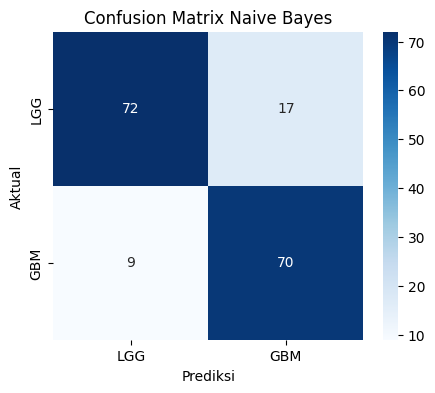

--- K-Nearest Neighbors ---
Akurasi: 0.8274
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.84        89
           1       0.81      0.82      0.82        79

    accuracy                           0.83       168
   macro avg       0.83      0.83      0.83       168
weighted avg       0.83      0.83      0.83       168



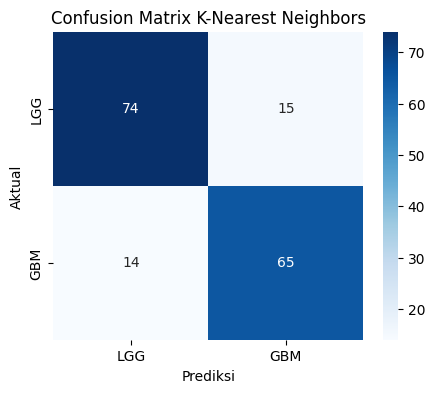

--- Decision Tree ---
Akurasi: 0.7857
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80        89
           1       0.77      0.78      0.78        79

    accuracy                           0.79       168
   macro avg       0.79      0.79      0.79       168
weighted avg       0.79      0.79      0.79       168



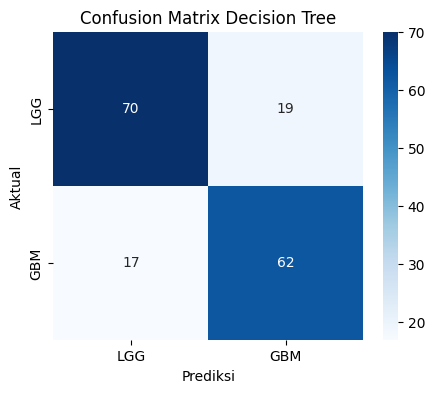

In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Baca dataset
df = pd.read_csv("glioma_dataset.csv")

# Preprocessing
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Race'] = le.fit_transform(df['Race'])

scaler = MinMaxScaler()
df['Age_at_diagnosis'] = scaler.fit_transform(df[['Age_at_diagnosis']])

bins = [0, 0.4, 0.6, 1.0]
labels = ['Muda', 'Dewasa', 'Lansia']
df['AgeGroup'] = pd.cut(df['Age_at_diagnosis'], bins=bins, labels=labels)

X_genes = df.iloc[:, 3:-2]
pca = PCA(n_components=5)
genes_pca = pca.fit_transform(X_genes)
for i in range(5):
    df[f'PC{i+1}'] = genes_pca[:, i]

X = df.drop(columns=['Grade', 'AgeGroup'] + list(X_genes.columns))
y = df['Grade']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
models = {
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"--- {name} ---")
    print(f"Akurasi: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['LGG', 'GBM'], yticklabels=['LGG', 'GBM'])
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.title(f'Confusion Matrix {name}')
    plt.show()


## Deploy


saya menggunakan streamlit untuk mendeploy

untuk linknya : https://refactored-space-xylophone-x5wprgx54jp92vg66-8501.app.github.dev/

### tampilan web deploy

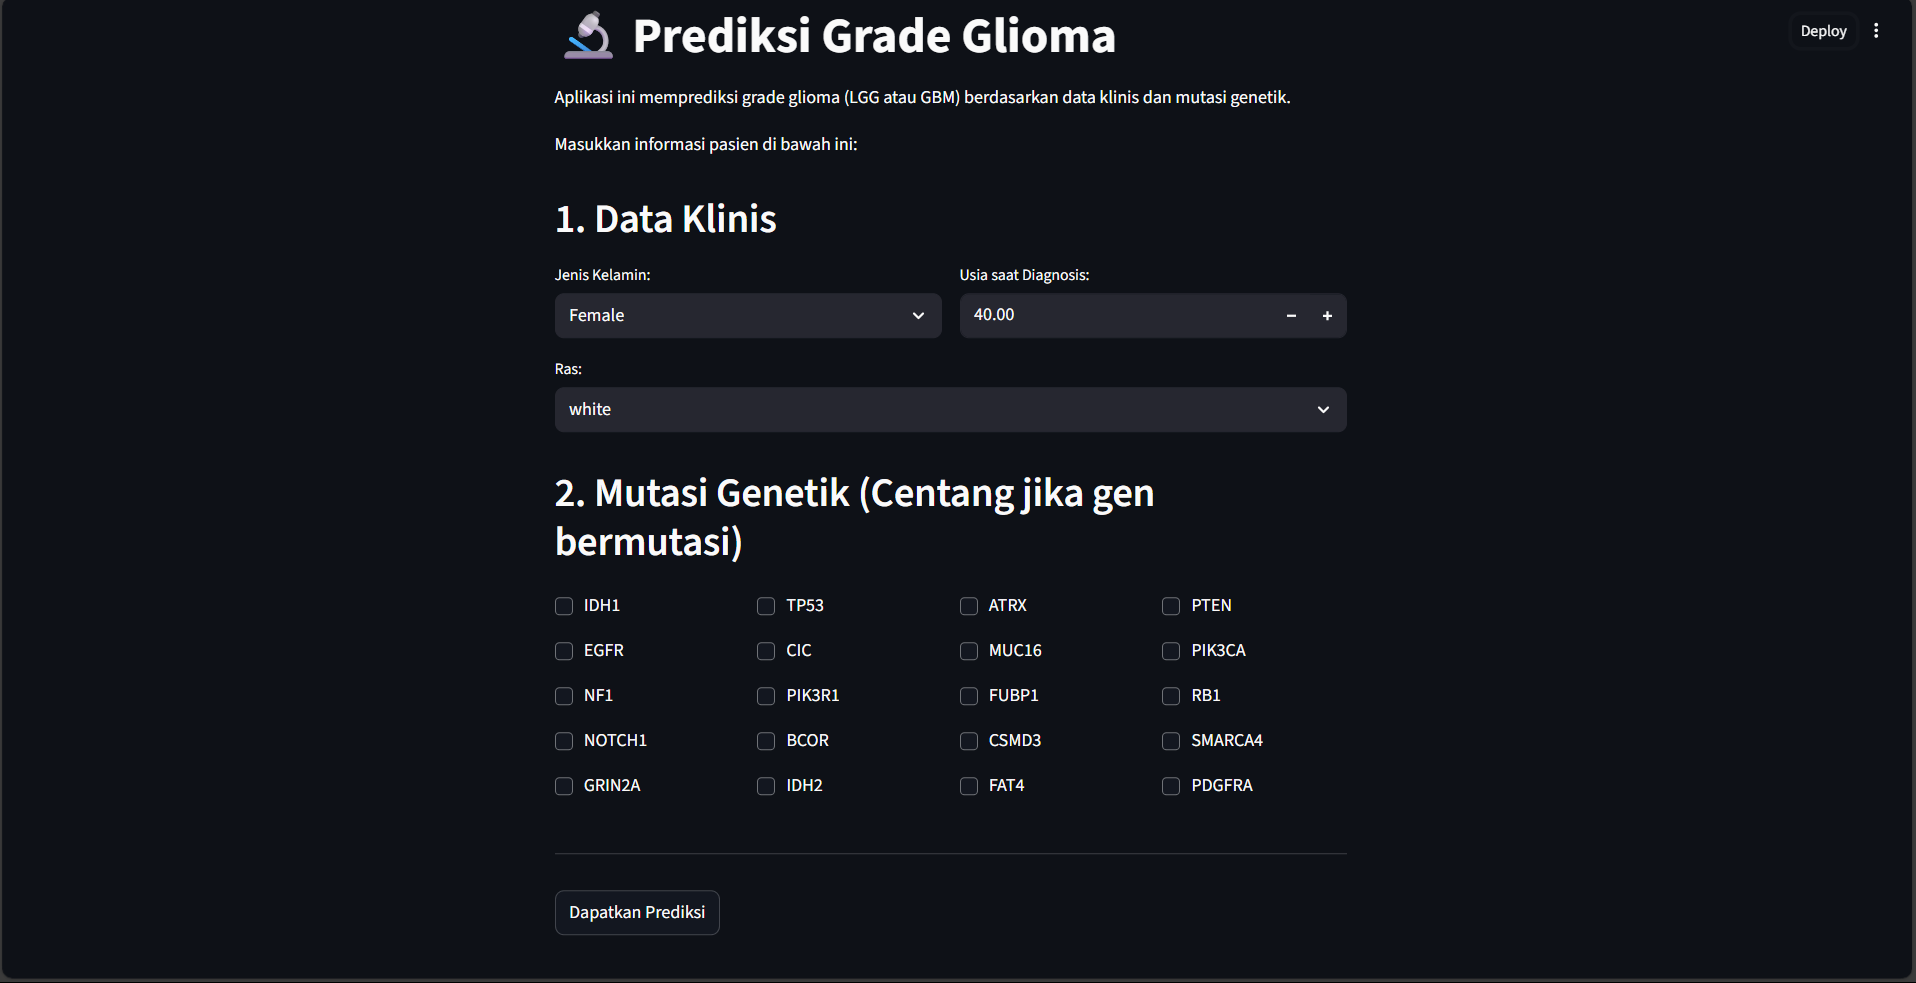